In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

G = nx.karate_club_graph()
print("Graph loaded:")
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Graph loaded:
Number of nodes: 34
Number of edges: 78


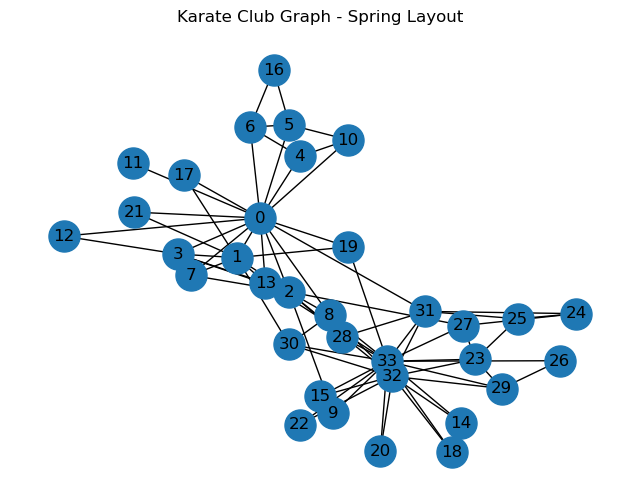

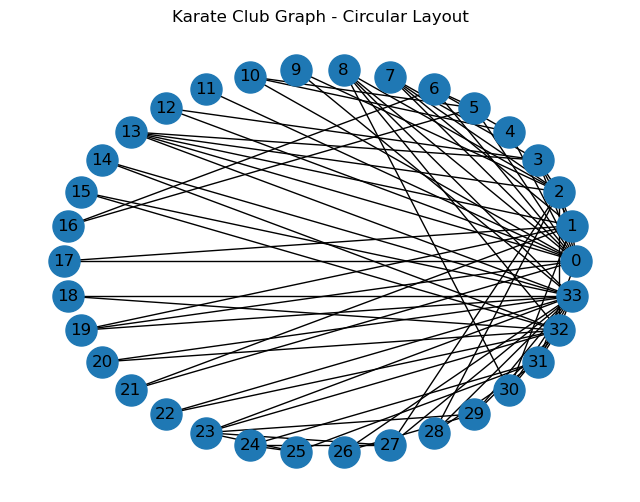

In [2]:
#Spring Layout
pos_spring = nx.spring_layout(G, seed=42)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos_spring, with_labels=True, node_size=500)
plt.title("Karate Club Graph - Spring Layout")
plt.axis("off")
plt.show()

#Circular Layout
pos_circular = nx.circular_layout(G)

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos_circular, with_labels=True, node_size=500)
plt.title("Karate Club Graph - Circular Layout")
plt.axis("off")
plt.show()

In [3]:
deg_centrality = nx.degree_centrality(G)

clustering_coeff = nx.clustering(G)

pagerank = nx.pagerank(G, alpha=0.85)

betweenness = nx.betweenness_centrality(G)

metrics_df = pd.DataFrame({
    'DegreeCentrality': pd.Series(deg_centrality),
    'ClusteringCoefficient': pd.Series(clustering_coeff),
    'PageRank': pd.Series(pagerank),
    'BetweennessCentrality': pd.Series(betweenness)
}).reset_index().rename(columns={'index': 'Node'})

print("Metrics per Node:")
display(metrics_df)


Metrics per Node:


,Node,DegreeCentrality,ClusteringCoefficient,PageRank,BetweennessCentrality
0,0,0.484848,0.150000,0.088508,0.437635
1,1,0.272727,0.333333,0.057415,0.053937
2,2,0.303030,0.244444,0.062767,0.143657
3,3,0.181818,0.666667,0.037212,0.011909
4,4,0.090909,0.666667,0.020504,0.000631
5,5,0.121212,0.500000,0.033810,0.029987
6,6,0.121212,0.500000,0.031529,0.029987
7,7,0.121212,1.000000,0.026465,0.000000
8,8,0.151515,0.500000,0.033382,0.055927
9,9,0.060606,0.000000,0.009463,0.000848


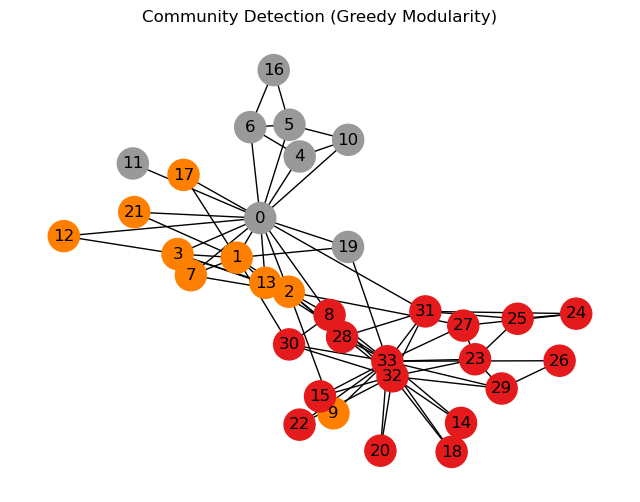

Greedy Modularity Communities:
Community 0: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 1: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Community 2: [0, 4, 5, 6, 10, 11, 16, 19]


In [4]:
communities_greedy = list(nx.algorithms.community.greedy_modularity_communities(G))

community_map = {}
for i, community in enumerate(communities_greedy):
    for node in community:
        community_map[node] = i

colors = [community_map[node] for node in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos_spring, with_labels=True, node_color=colors, cmap=plt.cm.Set1, node_size=500)
plt.title("Community Detection (Greedy Modularity)")
plt.axis("off")
plt.show()

print("Greedy Modularity Communities:")
for i, community in enumerate(communities_greedy):
    print(f"Community {i}: {sorted(list(community))}")


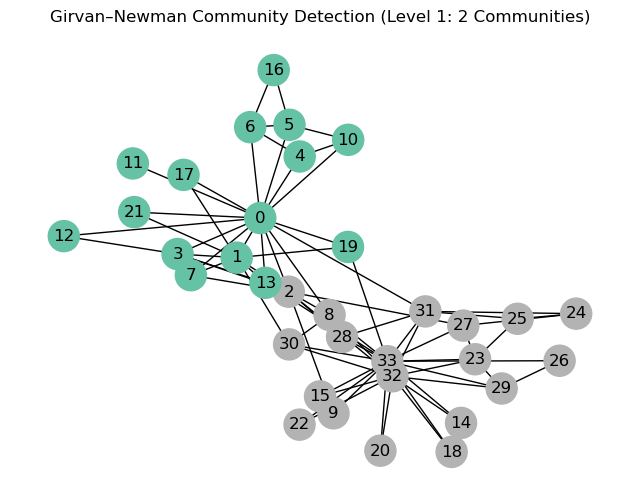

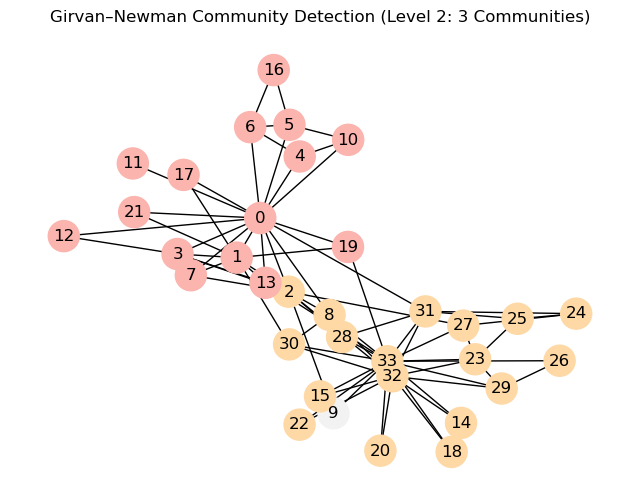

Girvan–Newman Communities (Level 1):
Community 0: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 1: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Girvan–Newman Communities (Level 2):
Community 0: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 1: [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 2: [9]


In [5]:

# Girvan-Newman
girvan_newman_gen = nx.algorithms.community.girvan_newman(G)

# First level split: two communities
communities_gn_level1 = tuple(sorted(c) for c in next(girvan_newman_gen))

# Second level split: three communities
communities_gn_level2 = tuple(sorted(c) for c in next(girvan_newman_gen))

community_map_gn1 = {}
for i, community in enumerate(communities_gn_level1):
    for node in community:
        community_map_gn1[node] = i
colors_gn1 = [community_map_gn1[node] for node in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos_spring, with_labels=True, node_color=colors_gn1, cmap=plt.cm.Set2, node_size=500)
plt.title("Girvan–Newman Community Detection (Level 1: 2 Communities)")
plt.axis("off")
plt.show()

community_map_gn2 = {}
for i, community in enumerate(communities_gn_level2):
    for node in community:
        community_map_gn2[node] = i
colors_gn2 = [community_map_gn2[node] for node in G.nodes()]

plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos_spring, with_labels=True, node_color=colors_gn2, cmap=plt.cm.Pastel1, node_size=500)
plt.title("Girvan–Newman Community Detection (Level 2: 3 Communities)")
plt.axis("off")
plt.show()

print("Girvan–Newman Communities (Level 1):")
for i, community in enumerate(communities_gn_level1):
    print(f"Community {i}: {community}")

print("\nGirvan–Newman Communities (Level 2):")
for i, community in enumerate(communities_gn_level2):
    print(f"Community {i}: {community}")
